# Census Income Prediction



# Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

In the daset Income is the target variable which has two classes so it termed to be a Classification problem. Here the prediction task is to determine whether a person makes over $50K a year.

In [1]:
#importing the necessary libraries

#Linear algebra
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#data processing
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

#algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import joblib


# Loading the dataset

In [2]:
#Reading the csv file
df=pd.read_csv('census.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The dataset contains the information of 51 state samples of US population.The dataset contains 15 columns including the features and the target variable. Here,Income column is the label which is less than or greater than 50K depending on the various features like Age, Workclass, Fnlwgt,Education, Education_num, marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week and Native_country.As Income variable has two classes i.e <=50K or >=50, it a a Classification Problem Statement and we need to redict that whether hte person's income is over 50K or not.



In [3]:
#checking top 5 rows 

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#checkiong last 5 rows

df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
#checking sample

df.sample(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
12725,25,Private,193820,Masters,14,Never-married,Prof-specialty,Own-child,White,Female,0,0,35,United-States,<=50K
3087,20,?,182117,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K


# Exploratory Data Analysis(EDA)


In [6]:
#checking the dimension of the dataframe
df.shape

(32560, 15)

In [7]:
#checking summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This provides the information about the dataset including the range index, column type, no null values and memory usage.

In [8]:
#checking datatype

df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

So, out of 15 columns, 6 are numeric data variables and 9 are categorical data variables.And we need to tranform these categorical data variables to numeric format for further preoceedings.

In [9]:
#checking unique values

df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

These are the number of unique values present in each column.



# checking for missing values



In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [11]:
#no null values are present


<AxesSubplot:>

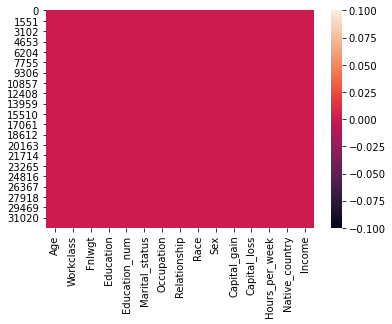

In [12]:
# Null values visulaization using heatmap

sns.heatmap(df.isnull())

We can get a clear visualization of no null data.



In [13]:
#checking the columns of the dataset

df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [14]:
#checking the value count for each columns

for i in df.columns:
    print(df[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

Using value_count method, we fount the list of values present in each column.

In [15]:
#Dropping the column having the more no. of zeroes

df.drop('Capital_loss',axis=1,inplace=True)


In [16]:
df.drop('Capital_gain',axis=1,inplace=True)


we can notice the columns capital gain and capital loss are having majorly '0s',which will impact the model prediction. So lets drop these columns

In [17]:
#checking hte dataset
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [18]:
#checking the value count for income

df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

These are the two unique values in the target variable which are <=50K and >=50K. We can state that the class is imbalanced and we need to balance the data using SMOTE before model building.


# Description of Dataset


In [19]:
df.describe()


,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect as there is no negative/invalid values present. From the above description we can observe the following things:


--The counts of the columns are same which means there is no missing values presentin any column.

--The mean is greater than the median(50%)in some columns which means they are skewed to the right.

--The mean and the median(50%) are almost equal in Education_num and Hours_per_week which means the data is symmetric in these columns hence the data is normal and no skewness present here.

--There is a huge difference in 75% amd max it shows that huge outliers are present in the columns.

--In summarizing the data we can observe that the dataset contains the person's age between 17 years to 90 years.

# Data Visualization

Univariate Analysis:

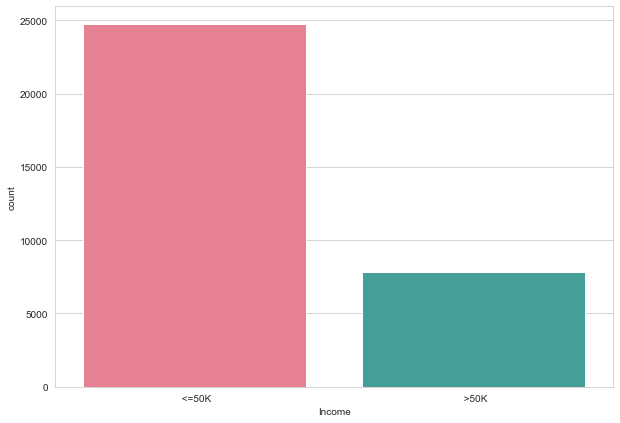

In [20]:
# Visualizing whether the income is above 50K or not.

plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(df['Income'],palette='husl')
plt.show()

Most of the people have the income less than or equal to 50K. We can also observe the class is imbalance and hence needs to balance it before model building.

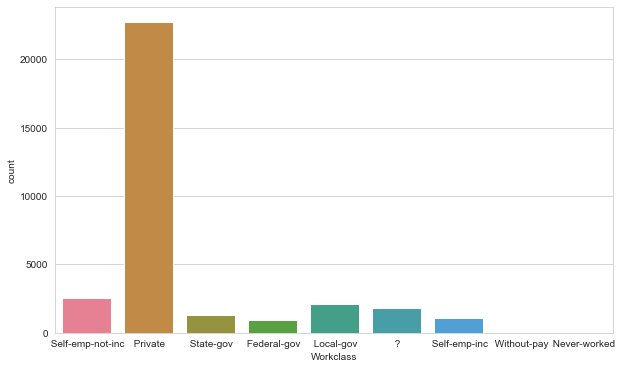

In [21]:
# Visualizing the count of Workclass of the people

plt.figure(figsize=(10,6))
sns.countplot(df['Workclass'],palette='husl')
plt.show()

We can see the count of Private workclass is high compare to others. This means the people working in private sectors are more than the people working in other sectors.



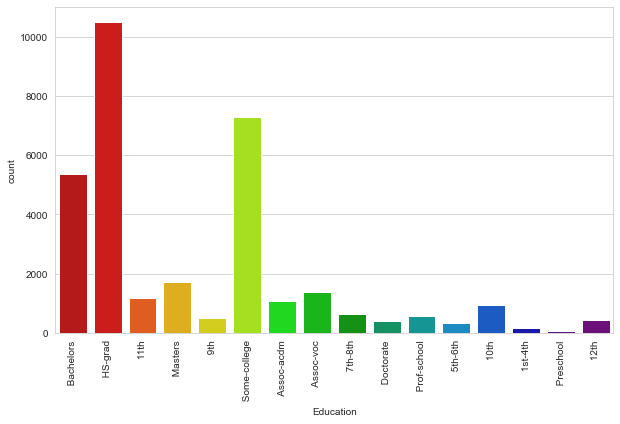

In [22]:
# Visualizing the count of Education of the people

plt.figure(figsize=(10,6))
sns.countplot(df['Education'],palette='nipy_spectral_r')
plt.xticks(rotation=90)
plt.show()

The count of HS-grad is high than others and the count is more than 10K.



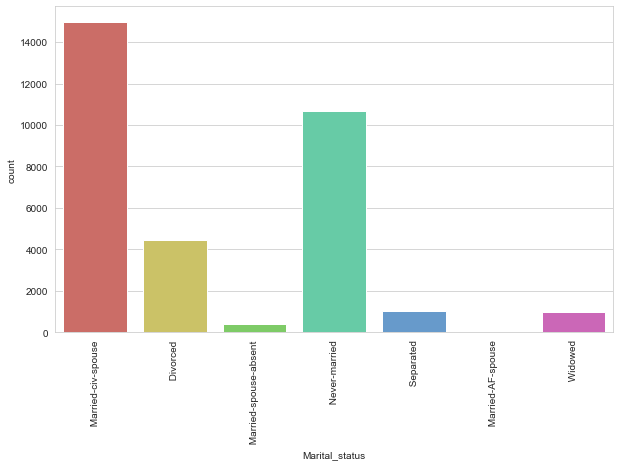

In [23]:
# Visualizing the count of Marital_status of the people

plt.figure(figsize=(10,6))
sns.countplot(df['Marital_status'],palette='hls')
plt.xticks(rotation=90)
plt.show()

The people who got married have high counts followed by the singles or nevermarried.



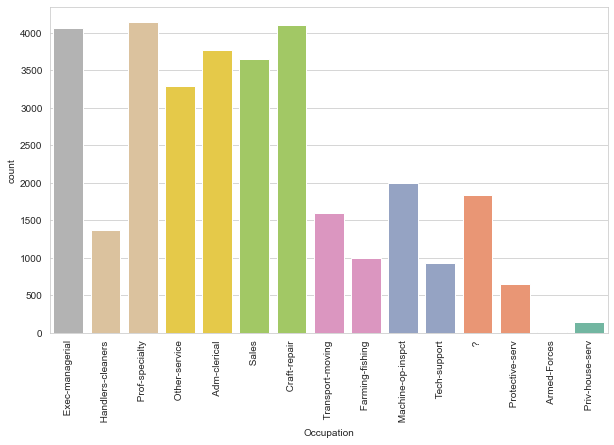

In [24]:
# Visualizing the count of Occupation of the people

plt.figure(figsize=(10,6))
sns.countplot(df['Occupation'],palette='Set2_r')
plt.xticks(rotation=90)
plt.show()

The people who are in the position of Prof-speciality have highest count and the people in the position Armed-Forces have very least counts.



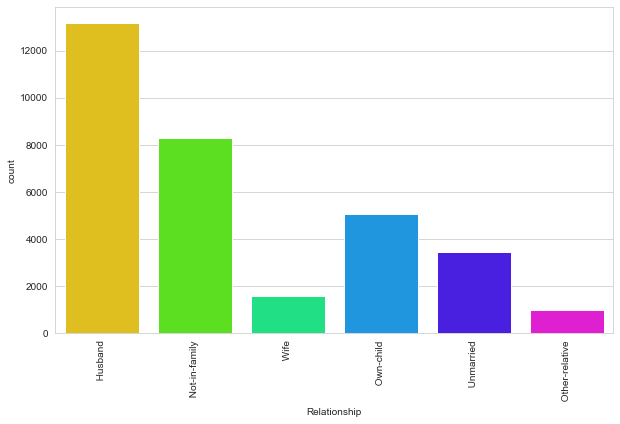

In [25]:
# Visualizing the count of Relationship of the people

plt.figure(figsize=(10,6))
sns.countplot(df['Relationship'],palette='hsv')
plt.xticks(rotation=90)
plt.show()

The count is high for the Husband Category which has around 15K of count and other relative has very least count.



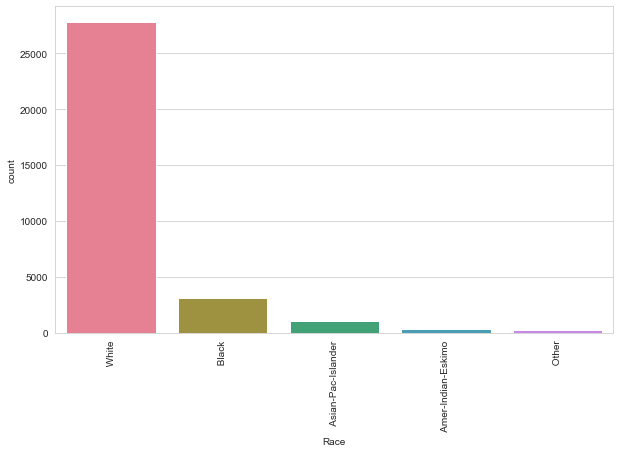

In [26]:
# Visualizing the count of Race of the people

plt.figure(figsize=(10,6))
sns.countplot(df['Race'],palette='husl')
plt.xticks(rotation=90)
plt.show()

White Family groups have high vount of around 30K whereas other race have least count.



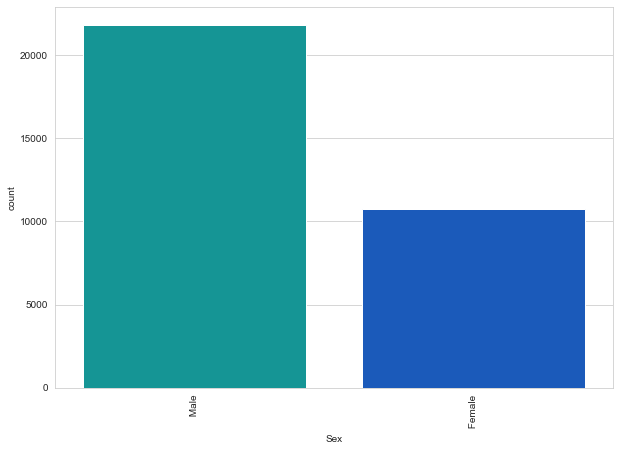

In [27]:
# Visualizing the count of Sex of the people

plt.figure(figsize=(10,7))
sns.countplot(df['Sex'],palette='winter_r')
plt.xticks(rotation=90)
plt.show()

The count of Male is high rather than the count of females.



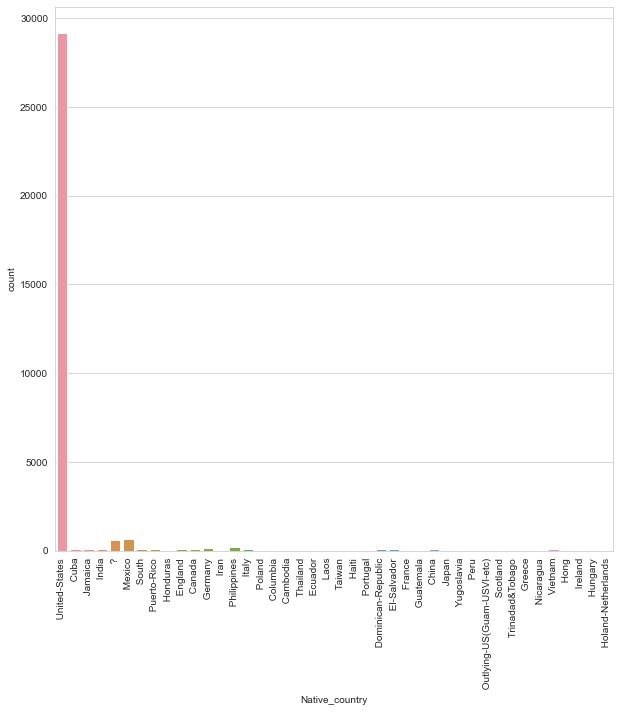

In [28]:
# Visualizing the count of Native_country of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

The United States Country has the highest count of around 29K and other countries have very less counts.



# Distribution Of Data(Skewness Visualization)

Text(0.5, 1.0, 'Distribution of Hours_per_week')

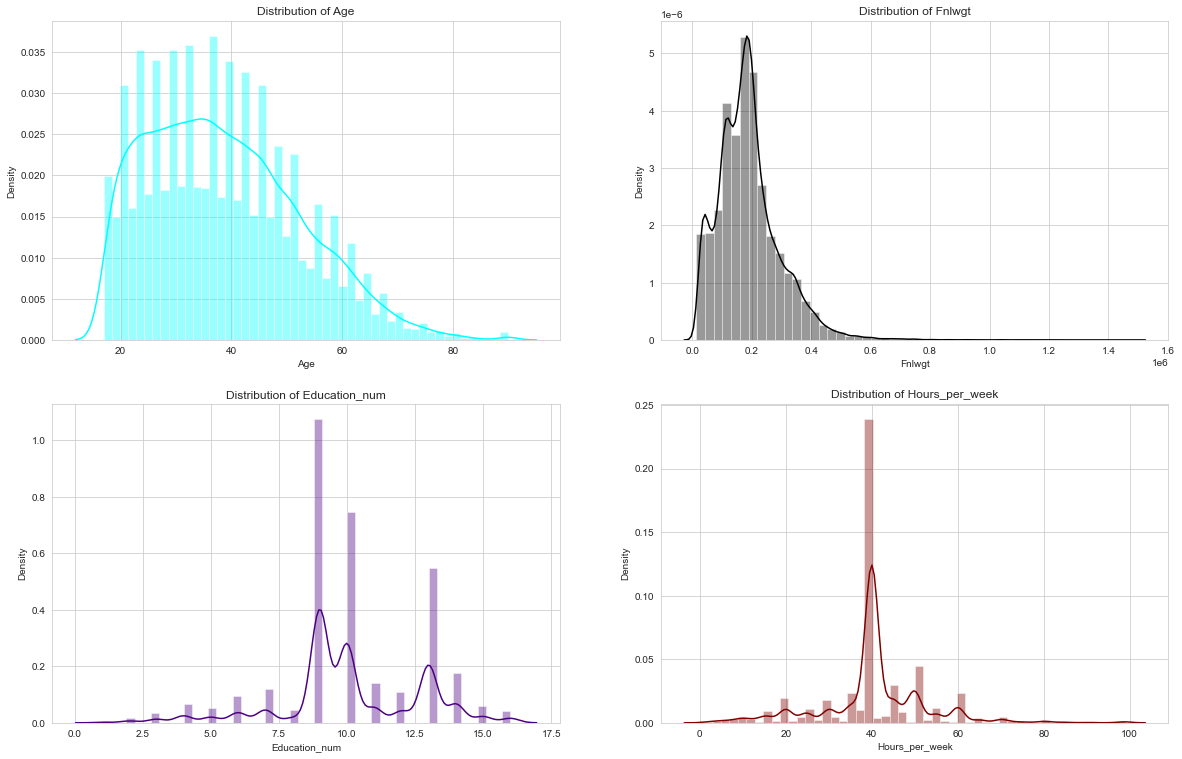

In [29]:
#checking the distribution plot 

plt.figure(figsize=(20,27))
plt.subplot(4,2,1)
sns.distplot(df['Age'],color='cyan')
plt.title('Distribution of Age')
plt.subplot(4,2,2)
sns.distplot(df['Fnlwgt'],color='black')
plt.title('Distribution of Fnlwgt')
plt.subplot(4,2,3)
sns.distplot(df['Education_num'],color='indigo')
plt.title('Distribution of Education_num')
plt.subplot(4,2,4)
sns.distplot(df['Hours_per_week'],color='maroon')
plt.title('Distribution of Hours_per_week')

Observations:

From the distribution plot of Fnlwgt column, we can see that the values are continuous so the distribution is right skewed.

The remaining distribution plot shows discrete values.

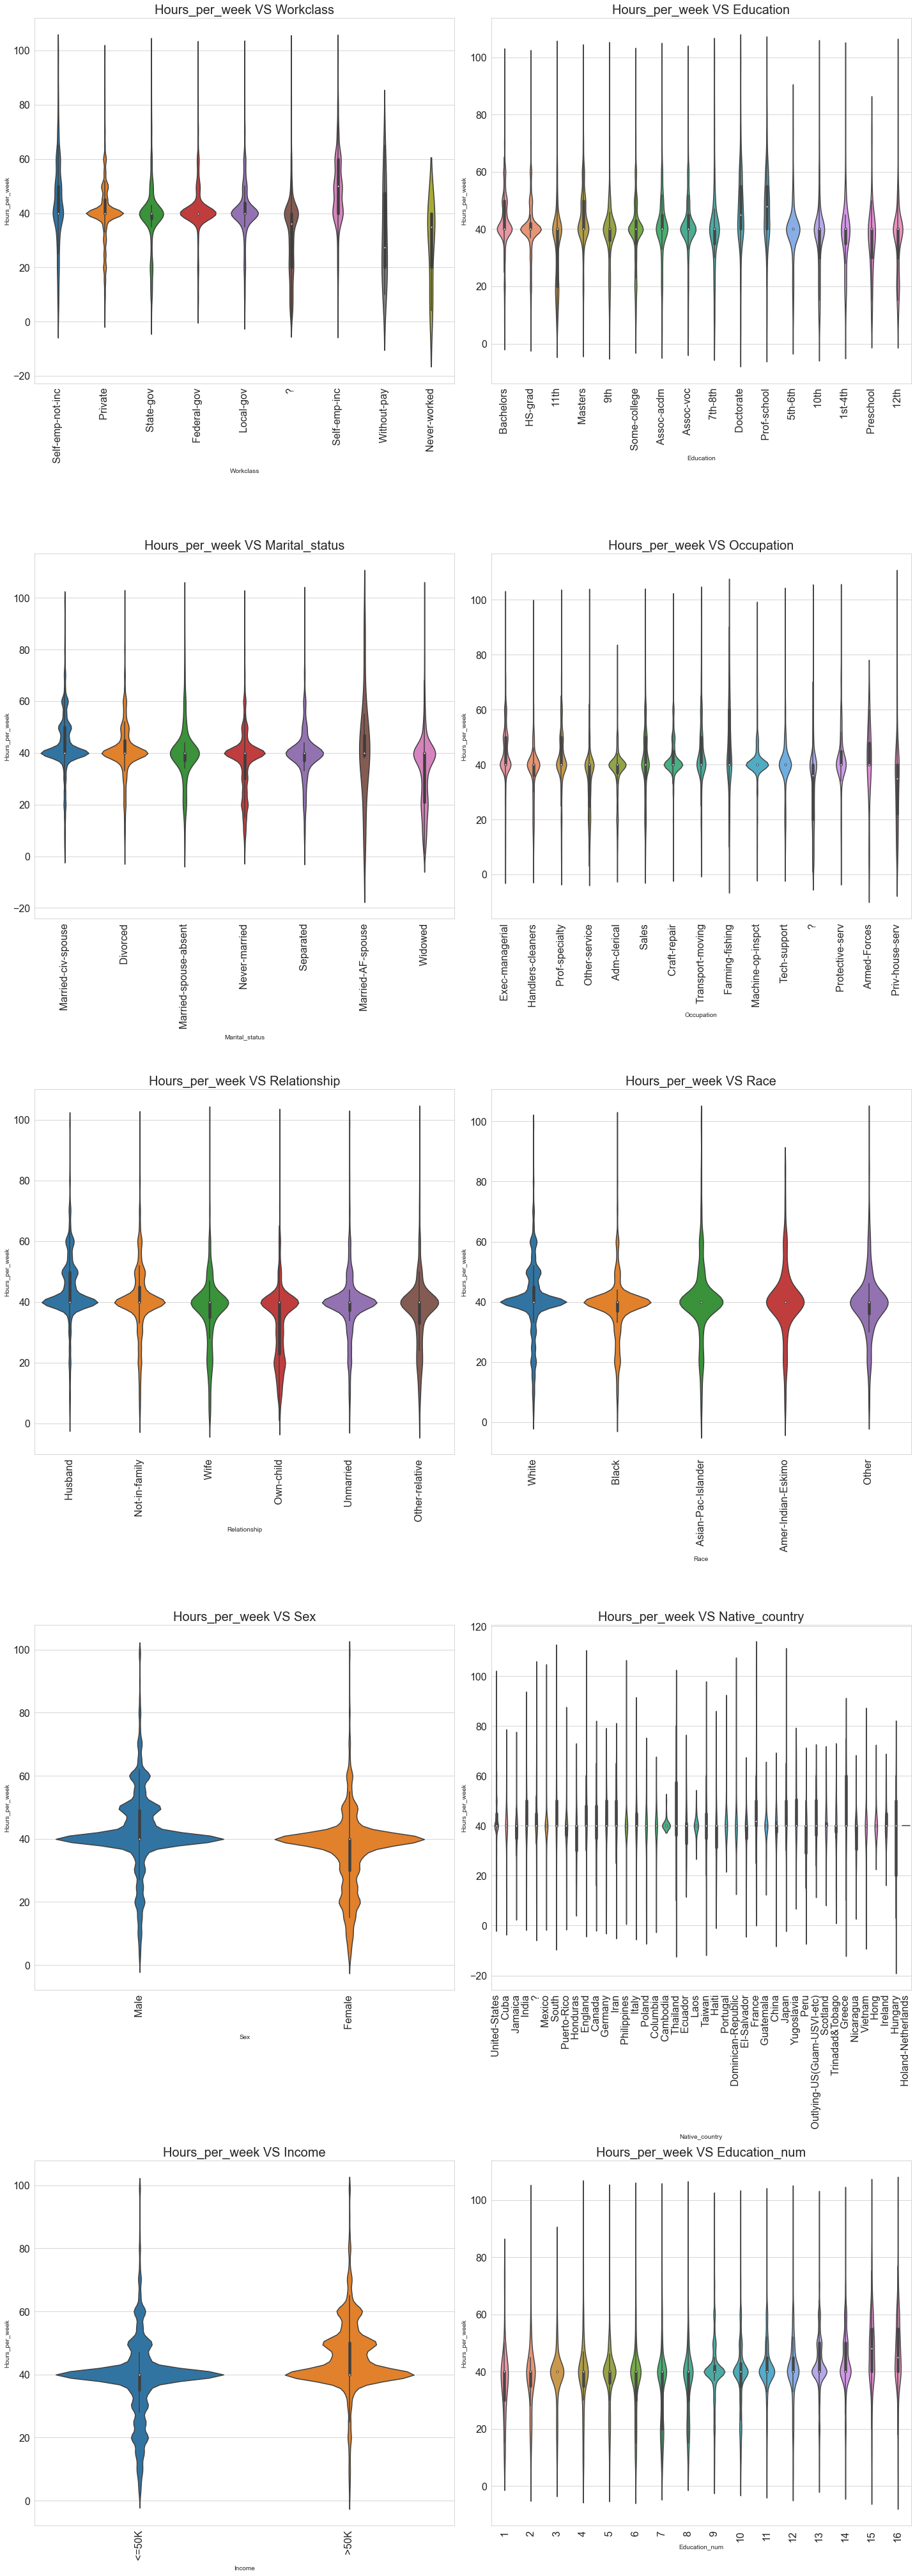

In [30]:
#Checking the relationship of Hour_per_week column with other object features using violinplot
col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income','Education_num']

plt.figure(figsize=(20,90))
for i in range(len(col)):
    plt.subplot(8,2,i+1)
    sns.violinplot(y=df['Hours_per_week'],x=df[col[i]])
    plt.title(f"Hours_per_week VS {col[i]}",fontsize=20)
    plt.xticks(rotation=90,fontsize=16)  
    plt.yticks(fontsize=16)
    plt.tight_layout()

Observations:

1.We see that Govt. Employees do not work more than 80 hours a week and that too in rare cases.

2.We can see that people with less education work higher number of hours per week.

3.It can be seen that Armed forces person doesnot work more than 60 hours a week while farmers and transport movers works more hours as compared to the other occupations.

4.More no. of individuals who have relationship like 'own-child' have high density of working only 20 hours a week.

5.It is seen that female works lesser no.of hours as compared to male.

6.From relationship, it can be see that people who are husband, works more as compared to others.

7.From Race, we can say that white people work more as compared to others.

8.From education, it can be seen that people who are prof. or are doing doctorate works higher no.of hours per week.

# Bivariate Analysis

<Figure size 720x720 with 0 Axes>

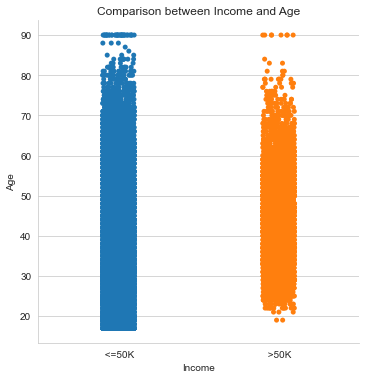

In [31]:
# Visualizing the age of the person who have more income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Age',data=df,kind='strip')
plt.title('Comparison between Income and Age')
plt.show()

We can say that the person below age of 25 having income less than or equal to 50K.

<Figure size 720x720 with 0 Axes>

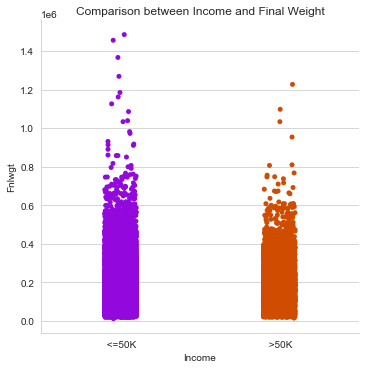

In [32]:
# Visualizing the Final Weight of the person who have more income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Fnlwgt',data=df,kind='strip',palette="gnuplot")
plt.title('Comparison between Income and Final Weight')
plt.show()

There is no significant relation between final weight and Income.



<Figure size 720x432 with 0 Axes>

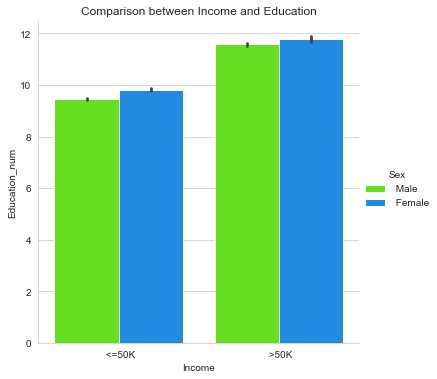

In [33]:
# Visualizing the number of the Education with income
plt.figure(figsize=(10,6))
sns.catplot(x='Income',y='Education_num',data=df,kind='bar',hue="Sex",palette="gist_rainbow")
plt.title('Comparison between Income and Education')
plt.show()

The income is more than 50K for the people having high education number. Here both gender have the income more than 50K

<Figure size 720x432 with 0 Axes>

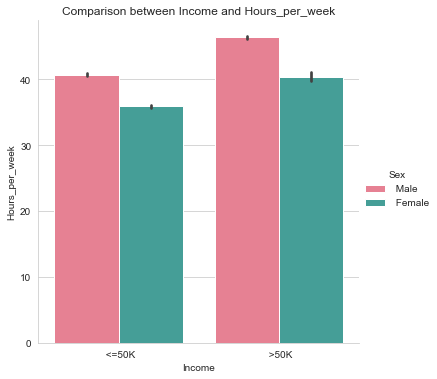

In [34]:
# Visualizing the number of Hours per week with income
plt.figure(figsize=(10,6))
sns.catplot(x='Income',y='Hours_per_week',data=df,kind='bar',hue='Sex',palette='husl')
plt.title('Comparison between Income and Hours_per_week')
plt.show()

This shows how the income is related to the hours per week. The income is >=50K when the hours is high for both male and female.



<Figure size 720x720 with 0 Axes>

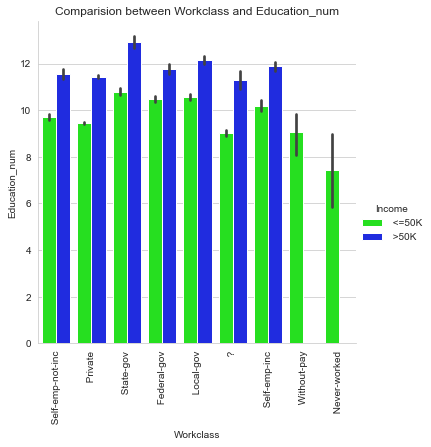

In [35]:
# Visualizing how the income changes with work class of the people
plt.figure(figsize=(10,10))
sns.catplot(x='Workclass',y='Education_num', data=df,kind='bar',hue="Income",palette='hsv');
plt.title('Comparision between Workclass and Education_num')
plt.xticks(rotation=90)
plt.show()

The people having gov sector jobs(State gov, Federal gov,Local gov) with high education number have the income >50K, also the Private sector position with average education number have second highest income >=50K.



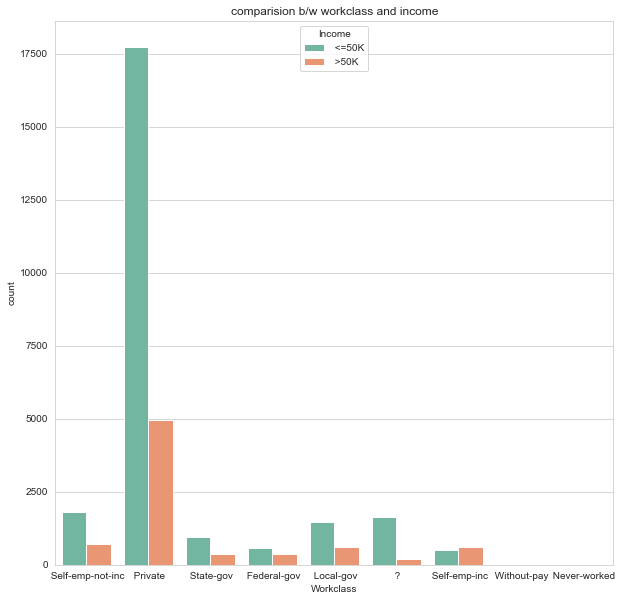

In [36]:
# Visualizing the relation between work class and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Workclass'],hue=df['Income'],palette='Set2')
plt.title('comparision b/w workclass and income')
plt.show()

The people who are working in the private sectors have the income <=50K and very few people in that sector have income >=50K.



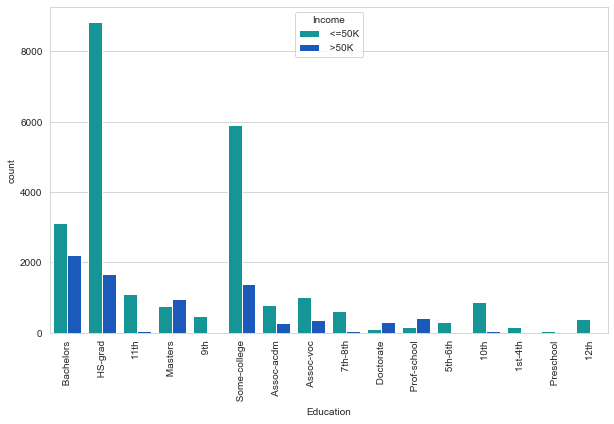

In [37]:
# Visualizing the relation between Education and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df['Education'],hue=df['Income'],palette='winter_r')
plt.xticks(rotation=90)
plt.show()

The people who have completed their high school have income <=50K followed by the people who done their Secondary School.And the people who have done their Graduation are earning more i.e 50K.

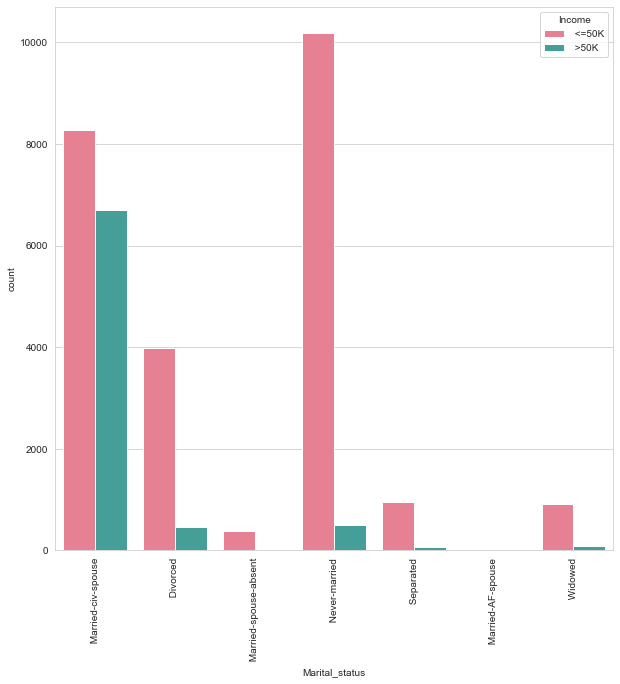

In [38]:
# Visualizing the relation between Marital status and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Marital_status'],hue=df['Income'],palette="husl")
plt.xticks(rotation=90)
plt.show()

The people who are married are having income >=50K. And the people who are never married are majorly earning <=50K.



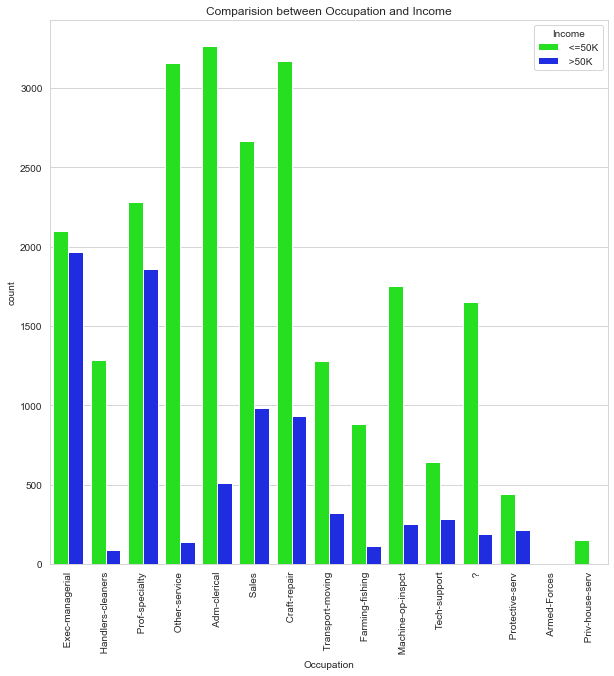

In [39]:
# Visualizing the relation between Occupation and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df["Occupation"],hue=df["Income"],palette='hsv')
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

Majority people who are in the position Prof-speciality, Other-service, Adm-clerical, Sales and Craft repair have the income more than 50K.

Very few people who are in the position Handlers-clearners, Farming fishing have income less than 50K

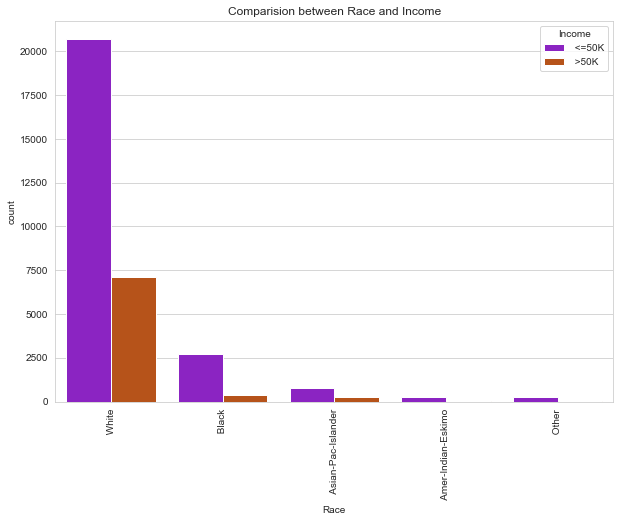

In [40]:
# Visualizing the relation between Race and Income of the people
plt.figure(figsize=(10,7))
sns.countplot(df['Race'],hue=df['Income'],data=df,palette='gnuplot')
plt.title("Comparision between Race and Income")
plt.xticks(rotation=90)
plt.show()

The White family groups have high income <50K compare to other racial groups.



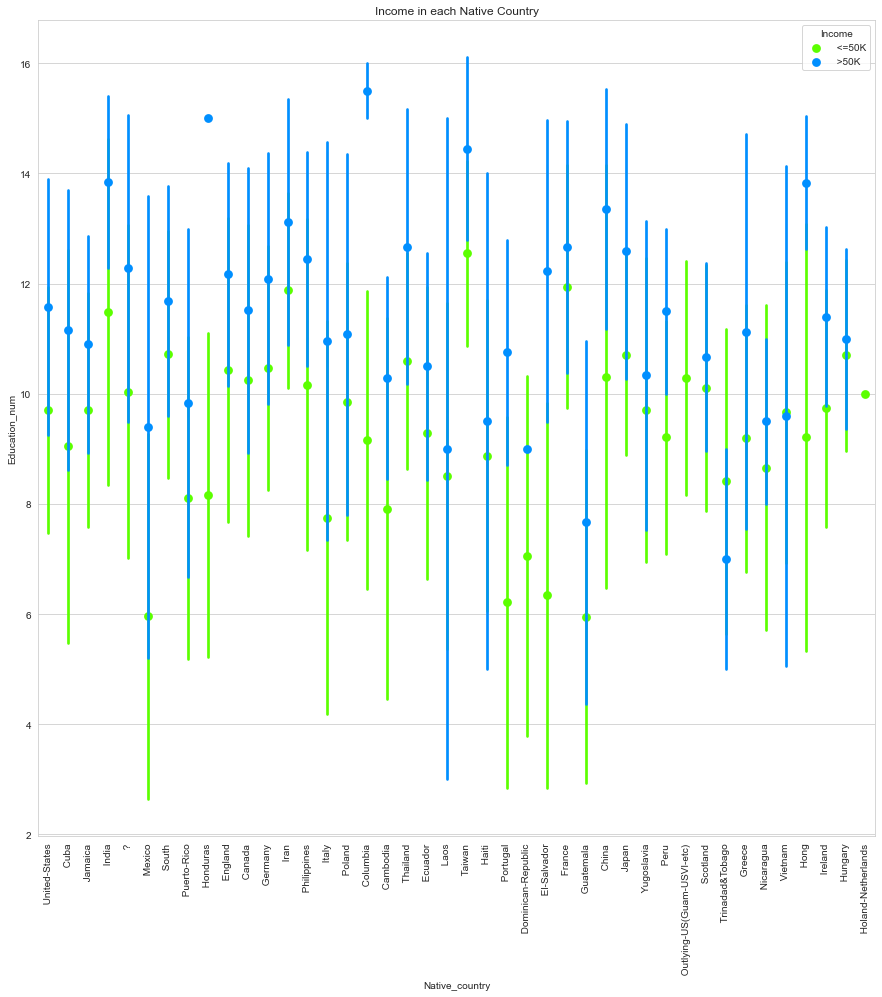

In [41]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="gist_rainbow",ci="sd")
plt.xticks(rotation=90)
plt.show()

The countries having high education numbers have high incoke that is more than 50K.



# Multivariate Analysis


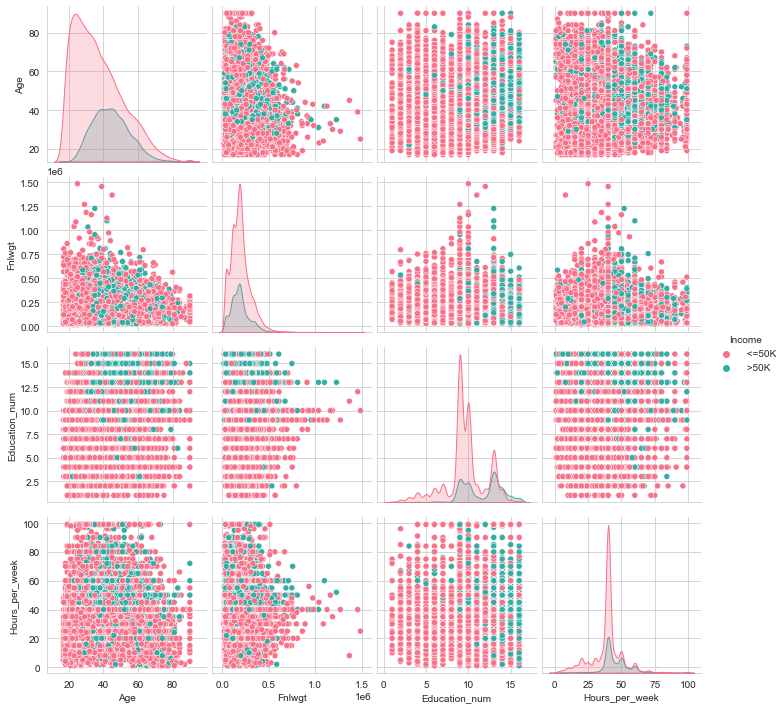

In [42]:
#checking the pairwise relationship in the dataset

sns.pairplot(df,hue='Income',palette='husl')

This gives the pairwise relation between the columns which is plotted on the basis of target variable "Income". We can see, most of the features are highly correlated with each other. Some of the featurs have outliers and skewness which needs to remove before model building.



# Outliers

Age                AxesSubplot(0.125,0.71587;0.775x0.16413)
Fnlwgt            AxesSubplot(0.125,0.518913;0.775x0.16413)
Education_num     AxesSubplot(0.125,0.321957;0.775x0.16413)
Hours_per_week       AxesSubplot(0.125,0.125;0.775x0.16413)
dtype: object

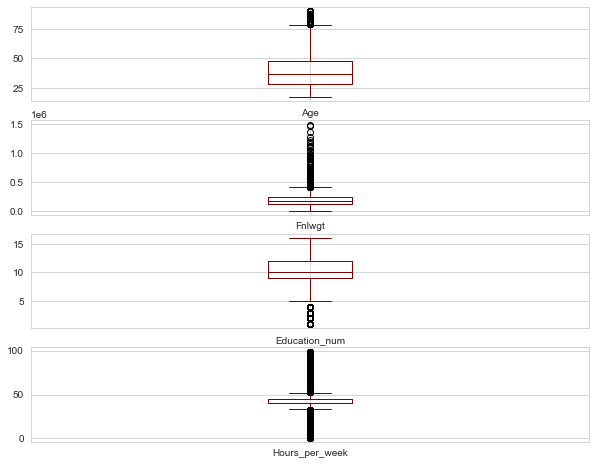

In [43]:
#plot for outliers

df.plot(kind='box',subplots=True,layout=(4,1),figsize=(10,8),color='maroon')

# Removing the outleirs

zscore Method

In [44]:
#Removing the outlers using the zscore

coll=df[['Age','Fnlwgt','Education_num','Hours_per_week']]
from scipy.stats import zscore
z=np.abs(zscore(coll))
z

array([[0.83709708, 1.0087417 , 1.13477863, 2.22212013],
       [0.04264043, 0.24504633, 0.42002663, 0.03542999],
       [1.05703146, 0.42576955, 1.19742926, 0.03542999],
       ...,
       [1.42358875, 0.3588108 , 0.42002663, 0.03542999],
       [1.21562378, 0.11092744, 0.42002663, 1.65520046],
       [0.98372   , 0.92986178, 0.42002663, 0.03542999]])

In [45]:
#creating the newdataframe
thresshold=3
new_df=df[(z<3).all(axis=1)]
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


This is the new dataframe after removing the outliers.We have removed the outliers whose zscore is less than 3.



In [46]:
#checking the dimension of data

print(df.shape)
print(new_df.shape)

(32560, 13)
(31461, 13)


# Data percent loss

In [47]:
loss=(32560-31462)/32560*100
loss

3.3722358722358723

Here we are losing only 3% data.

# Removing Skewness


In [48]:
new_df.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

as we can see there is skewness is present.soo we have to remove this skewness

In [49]:
# Removing skewness using cube root method

new_df['Fnlwgt']=np.cbrt(df['Fnlwgt'])
new_df.skew()

Age               0.472279
Fnlwgt           -0.376609
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

Now the skewness has been removed.



# Encoding the Data



In [50]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
list = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for val in list:
    new_df[val]=le.fit_transform(new_df[val].astype(str))

In [51]:
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6,43.675121,8,13,2,4,0,4,1,13,39,0
1,38,4,59.967204,10,9,0,6,1,4,1,40,39,0
2,53,4,61.685627,1,7,2,6,0,2,1,40,39,0
3,28,4,69.686283,8,13,2,10,5,2,0,40,5,0
4,37,4,65.776255,11,14,2,4,5,4,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,63.603506,6,12,2,13,5,4,0,38,39,0
32556,40,4,53.644440,10,9,2,7,0,4,1,40,39,1
32557,58,4,53.357498,10,9,6,1,4,4,0,40,39,0
32558,22,4,58.625222,10,9,4,1,3,4,1,20,39,0


This dataframe is having the encoded numerical data now.



# correlation

In [52]:
#checking the correlation

new_df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.013841,-0.062328,-0.000447,0.053361,-0.286424,-0.013628,-0.268028,0.030679,0.091664,0.097510,-0.000777,0.248351
Workclass,0.013841,1.000000,-0.013635,0.023067,0.052631,-0.064271,0.248164,-0.090722,0.048366,0.095209,0.128717,-0.006383,0.051504
Fnlwgt,-0.062328,-0.013635,1.000000,-0.024056,-0.031874,0.026902,0.003733,0.009060,-0.006959,0.023307,-0.015820,-0.054652,-0.002780
Education,-0.000447,0.023067,-0.024056,1.000000,0.356040,-0.039094,-0.021625,-0.015121,0.015552,-0.024911,0.061325,0.058092,0.077526
Education_num,0.053361,0.052631,-0.031874,0.356040,1.000000,-0.065568,0.112686,-0.102497,0.030849,0.016662,0.160483,0.022528,0.337595
Marital_status,-0.286424,-0.064271,0.026902,-0.039094,-0.065568,1.000000,-0.009028,0.185772,-0.067546,-0.127375,-0.197532,-0.021275,-0.198475
Occupation,-0.013628,0.248164,0.003733,-0.021625,0.112686,-0.009028,1.000000,-0.076199,0.007311,0.080495,0.071974,-0.011770,0.074643
Relationship,-0.268028,-0.090722,0.009060,-0.015121,-0.102497,0.185772,-0.076199,1.000000,-0.115216,-0.582940,-0.263412,-0.005806,-0.251506
Race,0.030679,0.048366,-0.006959,0.015552,0.030849,-0.067546,0.007311,-0.115216,1.000000,0.088642,0.045331,0.142246,0.072451
Sex,0.091664,0.095209,0.023307,-0.024911,0.016662,-0.127375,0.080495,-0.582940,0.088642,1.000000,0.239039,-0.008325,0.216665


This gives the correlation between dependent and independent variables. We can visualize this by using heatmap.



<AxesSubplot:>

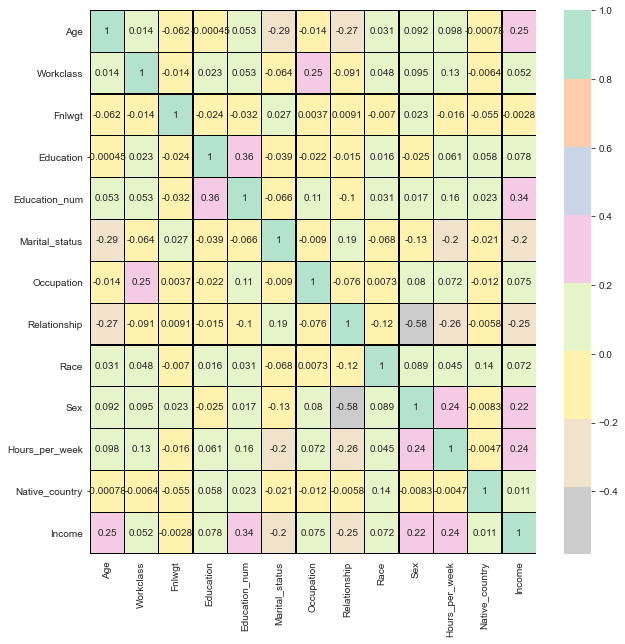

In [53]:
#visulazing correlation between depandent and indendent variables

plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(),linecolor='black',cmap='Pastel2_r',linewidths=0.2,annot=True)

This heatmap show the correlation matrix.

This heatmap contain both postive and negative correlation.

There is no much correlation b/w target and the label

The columns Education_num, Age, Sex and Hours_per_week have positive correlation with the label.

The columns Relationship and Sex are highly correlated with each other also the column Fnlwgt ha very has correlation with the label so we can drop this column.

There is no multicolinearity issue exits in the data.


# Visualizing the correlation between features and label 

Text(0.5, 1.0, 'correlation b/w label and the features ')

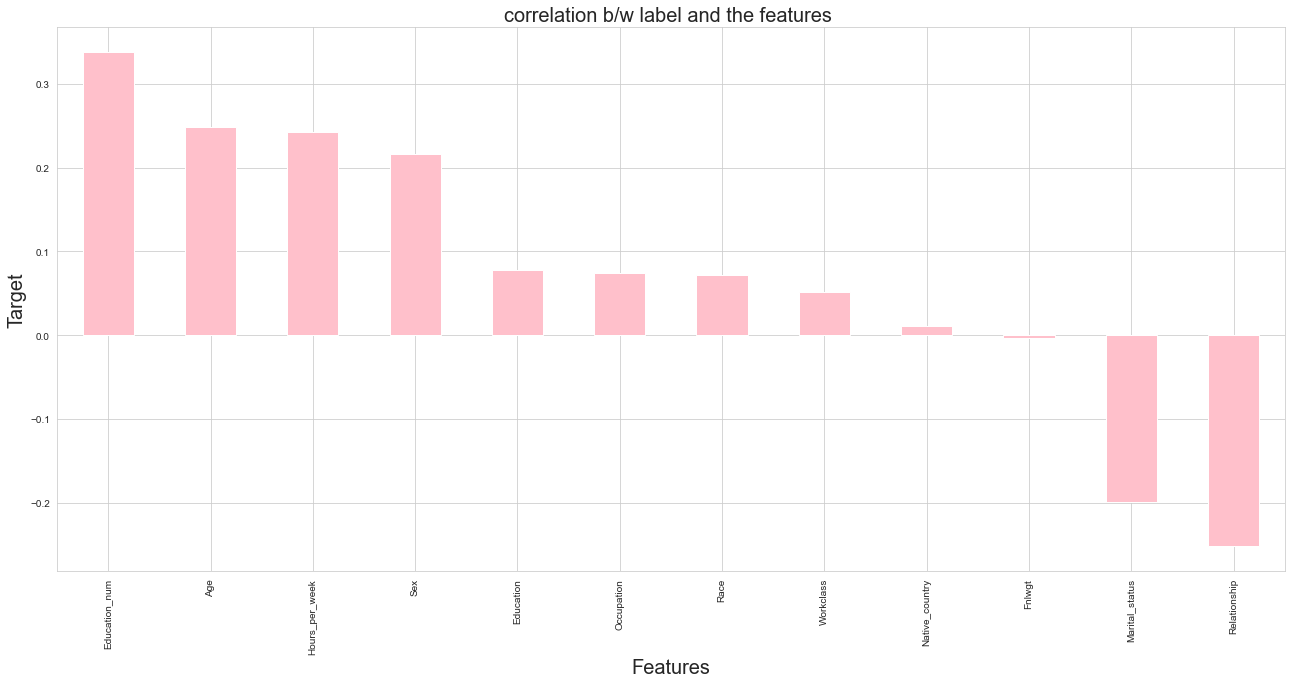

In [54]:
#visulization using the barplot

plt.figure(figsize=(22,10))
new_df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='pink')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('correlation b/w label and the features ',fontsize=20)

The column fnlwgt and workclass has very less relation with the label, so we can drop these columns if necessary.



# Checking for MultiColinearity


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.164917,Age
1,1.087184,Workclass
2,1.009136,Fnlwgt
3,1.156454,Education
4,1.198793,Education_num
5,1.138326,Marital_status
6,1.087997,Occupation
7,1.687974,Relationship
8,1.039156,Race
9,1.561158,Sex


 MultiColinearity is not present


# Separating the features and label variables

In [55]:
x=new_df.drop('Income',axis=1)
y=new_df['Income']

In [56]:
x.shape


(31461, 12)

In [57]:
y.shape

(31461,)

# Feature scaling

In [58]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,1.471126,-1.102052,-0.348344,1.154324,-0.403597,-0.609135,-0.903178,0.391304,0.706601,-2.424121,0.284981
1,-0.025350,0.089108,0.464976,0.245782,-0.459657,-1.733114,-0.136411,-0.281938,0.391304,0.706601,-0.008364,0.284981
2,1.100158,0.089108,0.630260,-2.427783,-1.266647,-0.403597,-0.136411,-0.903178,-1.969806,0.706601,-0.008364,0.284981
3,-0.775689,0.089108,1.399791,-0.348344,1.154324,-0.403597,0.809038,2.203019,-1.969806,-1.415226,-0.008364,-4.108624
4,-0.100384,0.089108,1.023711,0.542845,1.557819,-0.403597,-0.609135,2.203019,0.391304,-1.415226,-0.008364,0.284981
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,0.089108,0.814728,-0.942469,0.750829,-0.403597,1.518124,2.203019,0.391304,-1.415226,-0.187309,0.284981
31457,0.124718,0.089108,-0.143169,0.245782,-0.459657,-0.403597,0.099951,-0.903178,0.391304,0.706601,-0.008364,0.284981
31458,1.475327,0.089108,-0.170768,0.245782,-0.459657,2.255438,-1.318222,1.581780,0.391304,-1.415226,-0.008364,0.284981
31459,-1.225892,0.089108,0.335900,0.245782,-0.459657,0.925921,-1.318222,0.960541,0.391304,0.706601,-1.797814,0.284981


we have scaled the data using the standard scaller method

In [59]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

our data is imbalnce so we have to balance the data 

# Oversampling

In [98]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [99]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

now our data is balanced

# Modeling 

finding the Best random state

In [108]:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
print('Best accuracy is',maxAcc,'at random_state',maxRs)


Best accuracy is 0.8885550586920067 at random_state 163


# Creating train test split

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

splitted the data using the best random state

# DecisionTreeClassifier

In [113]:
# checking accuracy_score for DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
print('Confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

Accuracy_score 0.826648965902739
Confusion_matrix [[5875 1277]
 [1204 5956]]
classification_report               precision    recall  f1-score   support

           0       0.83      0.82      0.83      7152
           1       0.82      0.83      0.83      7160

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



# RandomforestClassifier

In [114]:
# checking accuracy_score for RandomforestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
print('Confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

Accuracy_score 0.8882057015092231
Confusion_matrix [[6217  935]
 [ 665 6495]]
classification_report               precision    recall  f1-score   support

           0       0.90      0.87      0.89      7152
           1       0.87      0.91      0.89      7160

    accuracy                           0.89     14312
   macro avg       0.89      0.89      0.89     14312
weighted avg       0.89      0.89      0.89     14312



# LogisticRegression

In [115]:
# checking accuracy_score for logisticregression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
print('Confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

Accuracy_score 0.7502096143096703
Confusion_matrix [[5228 1924]
 [1651 5509]]
classification_report               precision    recall  f1-score   support

           0       0.76      0.73      0.75      7152
           1       0.74      0.77      0.76      7160

    accuracy                           0.75     14312
   macro avg       0.75      0.75      0.75     14312
weighted avg       0.75      0.75      0.75     14312



# KNeighborsClassifier

In [116]:
# checking accuracy_score for KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
print('Confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

Accuracy_score 0.8427892677473449
Confusion_matrix [[5435 1717]
 [ 533 6627]]
classification_report               precision    recall  f1-score   support

           0       0.91      0.76      0.83      7152
           1       0.79      0.93      0.85      7160

    accuracy                           0.84     14312
   macro avg       0.85      0.84      0.84     14312
weighted avg       0.85      0.84      0.84     14312



# GradientBoostingClassifier

In [119]:
# checking accuracy_score for GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
print('Confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

Accuracy_score 0.856484069312465
Confusion_matrix [[5803 1349]
 [ 705 6455]]
classification_report               precision    recall  f1-score   support

           0       0.89      0.81      0.85      7152
           1       0.83      0.90      0.86      7160

    accuracy                           0.86     14312
   macro avg       0.86      0.86      0.86     14312
weighted avg       0.86      0.86      0.86     14312



# ExtraTreesClassifier

In [120]:
# checking accuracy_score for ExtraTreesClassifier

et=ExtraTreesClassifier()
et.fit(x_train,y_train)
pred=et.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,pred))
print('Confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

Accuracy_score 0.8948434879821129
Confusion_matrix [[6207  945]
 [ 560 6600]]
classification_report               precision    recall  f1-score   support

           0       0.92      0.87      0.89      7152
           1       0.87      0.92      0.90      7160

    accuracy                           0.89     14312
   macro avg       0.90      0.89      0.89     14312
weighted avg       0.90      0.89      0.89     14312



# Checking the cross validation score

In [123]:
from sklearn.model_selection import cross_val_score

# cv score for Decision Tree Classifier
print(cross_val_score(dt,x,y,cv=5).mean())

0.8272353861351525


In [124]:
# cv score for RandomForest Classifier
print(cross_val_score(rf,x,y,cv=5).mean())

0.8847958191490349


In [125]:
# cv score for ExtraTree classifier
print(cross_val_score(et,x,y,cv=5).mean())

0.8943330718152247


In [127]:
# cv score for Knn
print(cross_val_score(knn,x,y,cv=5).mean())

0.8488453817698292


In [128]:
# cv score for gradientBossting
print(cross_val_score(gb,x,y,cv=5).mean())

0.8474206400770858


ExtratreeClassifier is performing better among all of them so we will continue with Extratreeclassifier

# Hyperparameter Tuning

In [129]:
from sklearn.model_selection import GridSearchCV


In [197]:
parameters = {'criterion':["gini","entropy"],
             'max_depth':[10,20,30,40,50],
             "max_leaf_nodes":[2,3,4,5,6],
             "bootstrap":['True','False']}


gcv=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': ['True', 'False'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_leaf_nodes': [2, 3, 4, 5, 6]})

In [198]:
gcv.best_params_

{'bootstrap': 'True',
 'criterion': 'entropy',
 'max_depth': 50,
 'max_leaf_nodes': 6}

In [200]:
cencus=ExtraTreesClassifier(criterion='entropy',max_depth=50,max_leaf_nodes=6,bootstrap='True')
cencus.fit(x_train,y_train)
pred=cencus.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.7713806595863612



The accuracy of the best model after tuning  become less from 89% to 77.13% so we will  take the best  accuracy Model .

# Plotting ROC and compare AUC for all the models used

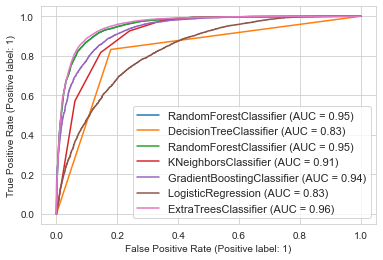

In [152]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(rf,x_test,y_test)
plot_roc_curve(dt, x_test, y_test, ax=disp.ax_) # ax_=Axes with confusion matrix
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(et, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Plotting ROC and Compare AUC for the best model

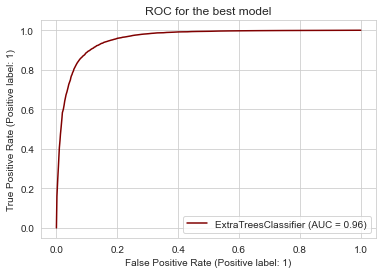

In [183]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(et, x_test, y_test,color='maroon')
plt.title("ROC for the best model")
plt.show()

The Auc for the best model is 0.96



# Saving The Model

In [184]:
joblib.dump(et,"Census Income Prediction.pkl")


['Census Income Prediction.pkl']

# Predicting the saved model


In [185]:
#Let's laod the saved model and get the prediction

model=joblib.load('Census Income Prediction.pkl')

#prediction
model.predict(x_test)

array([1, 1, 1, ..., 1, 0, 1])

In [186]:
pred_data=pd.DataFrame()
pred_data['Real_values']=y_test
pred_data['Predicted_by_model']=pred
pred_data

,Real_values,Predicted_by_model
33102,1,0
36513,1,1
31814,1,1
20215,0,1
27298,0,0
...,...,...
29550,1,1
30511,0,0
18618,0,1
7522,0,0


Conclusion:
    
In this dataset, we were asked to predict the income of people where the income is <50k or greater than 50k.

We analyzed the dataset firstly and then we performed EDA to understand the effect of features on our target label.

The data was found to be imbalanced so we used the balancing technique to balance the data by sampling it.

There were many outliers so we used the zscore method to replace outliers.

We performed model buildling using many models and we found that ExtraTreeclassifier was giving good matrix so we selected ExtraTreeclassifier model and performed hyperparameter tuning to increase the accuracy but accuracy is not increase so we save our model without hyperparamter tunnig.

The final model accuracy was found to be 89.43% and then we saved the final ML model.